In [2]:
import pandas as pd

In [3]:
df1=pd.read_csv("movies.csv")

In [6]:
df1.shape

(9742, 3)

In [4]:
df2 = pd.read_csv("ratings.csv")
df2.shape

(100836, 4)

In [8]:
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df2['userId'].value_counts()

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: count, Length: 610, dtype: int64

In [8]:
unique_users = df2['userId'].nunique()
print(unique_users)

610


In [9]:
merged_df = pd.merge(df2, df1, on='movieId')
# Count the number of ratings for each movie
ratings_count = merged_df['title'].value_counts()
most_rated_movie = ratings_count.idxmax()
max_ratings = ratings_count.max()
print(f"The movie with the maximum number of user ratings is: '{most_rated_movie}' with {max_ratings} ratings.")

The movie with the maximum number of user ratings is: 'Forrest Gump (1994)' with 329 ratings.


In [5]:
df3 = pd.read_csv("tags.csv")

In [12]:
df3.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?
matrix_movie_id = df1[df1['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = df3[df3['movieId'] == matrix_movie_id]['tag'].unique()
print(f"Tags submitted by users for 'Matrix, The (1999)': {matrix_tags}")

Tags submitted by users for 'Matrix, The (1999)': ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [11]:
# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?
terminator_movie_id = df1[df1['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator_ratings = df2[df2['movieId'] == terminator_movie_id]['rating']
average_rating = terminator_ratings.mean()
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


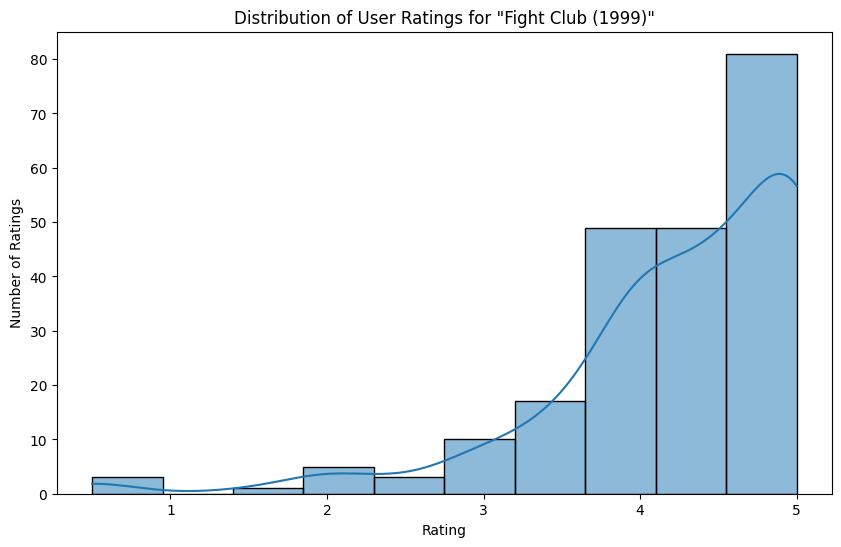

In [12]:
# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?
import matplotlib.pyplot as plt
import seaborn as sns

fight_club_movie_id = df1[df1['title'] == 'Fight Club (1999)']['movieId'].values[0]
fight_club_ratings = df2[df2['movieId'] == fight_club_movie_id]['rating']
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings, bins=10, kde=True)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

* We can see that the data distribution is left skewed.

In [6]:
# Group the user ratings based on movieId and apply aggregation like count and mean
ratings_grouped = df2.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()
# Applying inner join on the DataFrame created from movies.csv and the grouped df
merged_df = pd.merge(df1, ratings_grouped, on='movieId', how='inner')
# Filter only those movies which have more than 50 user ratings
final_df = merged_df[merged_df['rating_count'] > 50]
final_df.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [14]:
# Which movie is the most popular based on  average user ratings?
most_popular_movie = final_df.loc[final_df['rating_mean'].idxmax()]
print(f"Most popular movie based on average user ratings:\n")
print(f"Title: {most_popular_movie['title']}")

Most popular movie based on average user ratings:

Title: Shawshank Redemption, The (1994)


In [24]:
# Top 5 popular movies based on number of user ratings.
top_5= final_df.sort_values(by='rating_count', ascending=False).head(5)
print("Top 5 popular movies based on the number of user ratings:\n")
print(top_5['title'])

Top 5 popular movies based on the number of user ratings:

314                  Forrest Gump (1994)
277     Shawshank Redemption, The (1994)
257                  Pulp Fiction (1994)
510     Silence of the Lambs, The (1991)
1938                  Matrix, The (1999)
Name: title, dtype: object


In [27]:
# Which Sci-Fi movie is "third most popular" based on the number of user ratings?
sci_fi_movies_df = final_df[final_df['genres'].str.contains('Sci-Fi', case=False, na=False)]
if len(sci_fi_movies_df) >= 3:
    sorted_sci_fi_movies = sci_fi_movies_df.sort_values(by='rating_count', ascending=False)
    third = sorted_sci_fi_movies.iloc[2] 
    print(f"Title: {third['title']}")
else:
    print("There are fewer than 3 Sci-Fi movies with more than 50 user ratings.")

Title: Jurassic Park (1993)


In [7]:
links = pd.read_csv("links.csv")
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
from bs4 import BeautifulSoup
import requests
import numpy as np

In [ ]:
merged_df = pd.merge(final_df, links, on='movieId', how='inner')

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    try:
        response = requests.get(URL, headers=request_header)
        soup = BeautifulSoup(response.text, 'html.parser')
        imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
        return float(imdb_rating.text) if imdb_rating else np.nan
    except Exception as e:
        print(f"Error fetching IMDb rating for {imdbId}: {e}")
        return np.nan

# Fetch IMDb ratings for each movie
merged_df['imdb_rating'] = merged_df['imdbId'].apply(lambda x: scrapper(x) if pd.notna(x) else np.nan)

# Drop movies with no IMDb rating
rated_movies_df = merged_df.dropna(subset=['imdb_rating'])

# Find the movie with the highest IMDb rating
if not rated_movies_df.empty:
    highest_rated_movie = rated_movies_df.loc[rated_movies_df['imdb_rating'].idxmax()]

    # Print the movieId of the movie with the highest IMDb rating
    print(f"MovieId of the movie with the highest IMDb rating: {highest_rated_movie['movieId']}")
else:
    print("No movies with IMDb ratings were found.")
